In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import os

from test_transformers.src.test2_transformers.models.t5.modeling_t5_2 import T5ForConditionalGeneration
# from test_transformers.src.test2_transformers.models.longt5.modeling_longt5 import LongT5ForConditionalGeneration
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import argparse
import logging
import time
import torch

In [3]:
from data_t5_2 import data_process
from inference_t5_2 import keyphrases_selection,calculate_score2
from torch.utils.data import DataLoader
# from transformers import T5ForConditionalGeneration, LongT5ForConditionalGeneration


def get_setting_dict():
    setting_dict = {}
    setting_dict["max_len"] = 512
    
    # setting_dict["temp_en1"] = "Answer the following question by reasoning step-by-step. "
    setting_dict["temp_en2"] = "Keyword extraction: Extract keywords that reflect the key ideas of this book. "

    setting_dict["temp_en1"] = "Book:"
    setting_dict["temp_de1"] = "This book mainly talks about "
    # setting_dict["temp_de1"] = "Keyphrases: "
    setting_dict["temp_de2"] = "And in certain sections, this book talks about "
    setting_dict["temp_de3"] = "Therefore, the keyphrases of this text are "
    setting_dict["model"] = "base"
    setting_dict["enable_filter"] = False
    setting_dict["enable_pos"] = False
    setting_dict["enable_freq"] = False
    setting_dict["enable_att"] = True
    setting_dict["position_factor"] = 1.2e8
    setting_dict["length_factor"] = 0.6
    return setting_dict

def parse_argument(dataset_dir=None, dataset_name=None, batch_size=None, log_dir=None):

    if not all([dataset_dir, dataset_name, batch_size, log_dir]):
        raise ValueError("All arguments (dataset_dir, dataset_name, batch_size, log_dir) must be provided.")

    import argparse
    parser = argparse.Namespace(
        dataset_dir=dataset_dir,
        dataset_name=dataset_name,
        batch_size=batch_size,
        log_dir=log_dir
    )
    return parser



In [4]:
dataset = "SemEval2017"
args = parse_argument(
    dataset_dir=f"data/{dataset}", 
    dataset_name=f"{dataset}",
    batch_size=128,
    log_dir="path/to/log"
)

# 실험하자자자

In [12]:
# from transformers import T5ForConditionalGeneration, LongT5ForConditionalGeneration
from test_transformers.src.test2_transformers.models.t5.modeling_t5 import T5ForConditionalGeneration
setting_dict = get_setting_dict()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = T5ForConditionalGeneration.from_pretrained("t5-"+ setting_dict["model"])
model.to(device)

weighted cross-attention t5 version


T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [7]:
setting_dict = get_setting_dict()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = T5ForConditionalGeneration.from_pretrained("t5-"+ setting_dict["model"])
model.to(device)
dataset, doc_list, labels, labels_stemed= data_process(setting_dict, args.dataset_dir, args.dataset_name,1,9, model, device)
dataloader = DataLoader(dataset, num_workers=12, batch_size=args.batch_size)

weighted cross-attention t5 version
[WARNING] '4nmin −' not matched in doc.
[WARNING] '4nmin −' not matched in doc.
document idx that does not match the number of candidate and t5 tokenization candidate
25
[WARNING] 'core 〉' not matched in doc.
[WARNING] 'iyi ′' not matched in doc.
[WARNING] '⩽ hcore' not matched in doc.
[WARNING] 'iyi ″' not matched in doc.
[WARNING] 'yi ′' not matched in doc.
[WARNING] 'core 〉' not matched in doc.
[WARNING] 'iyi ′' not matched in doc.
[WARNING] '⩽ hcore' not matched in doc.
[WARNING] 'iyi ″' not matched in doc.
[WARNING] 'yi ′' not matched in doc.
document idx that does not match the number of candidate and t5 tokenization candidate
52
[WARNING] 'sc ∼' not matched in doc.
[WARNING] 'sc ∼' not matched in doc.
document idx that does not match the number of candidate and t5 tokenization candidate
53
[WARNING] 'o2 − ions' not matched in doc.
[WARNING] 'o2 − ions' not matched in doc.
document idx that does not match the number of candidate and t5 tokeniza

Token indices sequence length is longer than the specified maximum sequence length for this model (524 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (524 > 512). Running this sequence through the model will result in indexing errors


[WARNING] 'p :d' not matched in doc.
[WARNING] 'l :p :d' not matched in doc.
[WARNING] 'order l :p :d' not matched in doc.
[WARNING] 'p :d' not matched in doc.
[WARNING] 'l :p :d' not matched in doc.
[WARNING] 'order l :p :d' not matched in doc.
document idx that does not match the number of candidate and t5 tokenization candidate
208
[WARNING] '° c' not matched in doc.
[WARNING] '° c' not matched in doc.
document idx that does not match the number of candidate and t5 tokenization candidate
210
[WARNING] 'ε ∞' not matched in doc.
[WARNING] 'ε ∞' not matched in doc.
document idx that does not match the number of candidate and t5 tokenization candidate
217
[WARNING] 'al-o ⋯ h2' not matched in doc.
[WARNING] 'al-o ⋯ h2' not matched in doc.
document idx that does not match the number of candidate and t5 tokenization candidate
224
[WARNING] 'cm ×' not matched in doc.
[WARNING] 'cm ×' not matched in doc.
document idx that does not match the number of candidate and t5 tokenization candidate
2

In [27]:
from transformers import T5ForConditionalGeneration
model2 = T5ForConditionalGeneration.from_pretrained("t5-"+ setting_dict["model"])
model2.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [15]:
a= calculate_score2(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,0,1,0,0.,0.05,1.2e8,2)

27.0
37.93
41.84


In [14]:
cosine_similarity_rank=keyphrases_selection(setting_dict, doc_list, labels_stemed, labels,  model, dataloader,0.3,0.1,15, device)

Evaluating::   0%|          | 0/166 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PAR

0.27040769999091985
0.3794407772750872
0.41954095070864167


In [12]:
a=calculate_score2(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,0,1,0,0.,1,1.2e8,1)

14.49
19.55
21.25


In [12]:
a=calculate_score2(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,0,1,0,0.,0.9,1.2e8,1)

26.25
31.54
31.08


In [10]:
a=calculate_score2(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,0,1,0,0.,0.9,1.2e8,2)

26.64
31.32
31.53


ValueError: too many values to unpack (expected 2)

In [19]:
df = pd.concat(new_cand_score, ignore_index=True)


In [ ]:
import pandas as pd

# tensor(...) → int/float로 변환 (필요한 경우)
df['doc_id'] = df['doc_id'].apply(lambda x: int(str(x).split('(')[-1].split(')')[0]))
df['score'] = df['score'].astype(float)
df['whole_att_score'] = df['whole_att_score'].apply(lambda x: float(str(x).split('(')[-1].split(',')[0]))

rows = []

for doc_id, group in df.groupby('doc_id'):
    # Score 기준 상위 15개
    top_score = group.nlargest(15, 'score')[['candidate']].reset_index(drop=True)
    for i, row in top_score.iterrows():
        rows.append({
            'doc_id': doc_id,
            'rank': i + 1,
            'candidate': row['candidate'],
            'source': 'score'
        })

    # Attention 기준 상위 15개
    top_att = group.nlargest(15, 'whole_att_score')[['candidate']].reset_index(drop=True)
    for i, row in top_att.iterrows():
        rows.append({
            'doc_id': doc_id,
            'rank': i + 1,
            'candidate': row['candidate'],
            'source': 'attention'
        })

# 결과 데이터프레임
ranked_candidates_df = pd.DataFrame(rows)

# 미리보기
print(ranked_candidates_df.head(30))


In [26]:
import pandas as pd



# tensor(...) → int/float로 변환 (필요한 경우)
df['doc_id'] = df['doc_id'].apply(lambda x: int(str(x).split('(')[-1].split(')')[0]))
df['score'] = df['score'].astype(float)
df['whole_att_score'] = df['whole_att_score'].apply(lambda x: float(str(x).split('(')[-1].split(',')[0]))

# 결과 저장용 리스트
results = []

for doc_id, group in df.groupby('doc_id'):
    top_score = group.nlargest(15, 'score')['candidate']
    top_att = group.nlargest(15, 'whole_att_score')['candidate']
    
    # 공통 후보 개수
    overlap = len(set(top_score) & set(top_att))
    
    results.append({
        'doc_id': doc_id,
        'overlap_count': overlap,
        'overlap_ratio': overlap / 15
    })

# 결과 데이터프레임으로 정리
result_df = pd.DataFrame(results)
print(result_df.head())

# 평균 일치도
mean_overlap = result_df['overlap_ratio'].mean()
print(f"\n전체 문서 평균 일치도: {mean_overlap:.4f}")


   doc_id  overlap_count  overlap_ratio
0       0              0       0.000000
1       1              5       0.333333
2       2              1       0.066667
3       3              1       0.066667
4       4              3       0.200000

전체 문서 평균 일치도: 0.1481


In [42]:
import itertools

def token_overlap_diversity(words):
    # 단어들을 토큰으로 분해 (스페이스 기준, 필요시 더 정교하게)
    tokenized = [set(w.lower().split()) for w in words]
    
    overlaps = []
    for w1, w2 in itertools.combinations(tokenized, 2):
        intersection = w1 & w2
        union = w1 | w2
        if union:
            jaccard = len(intersection) / len(union)
            overlaps.append(jaccard)
    
    if overlaps:
        mean_overlap = np.mean(overlaps)
        diversity = 1 - mean_overlap
    else:
        diversity = np.nan

    return diversity
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import torch

# GPU 사용 가능한지 체크 후 device 지정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# BERT-base 모델 로드 + GPU 할당
model = SentenceTransformer('all-mpnet-base-v2', device=device)

def extract_float_from_tensor(x):
    try:
        s = str(x)
        import re
        match = re.search(r'tensor\(([\d\.\-e]+)', s)
        if match:
            return float(match.group(1))
        else:
            return float(s)
    except:
        return np.nan

def extract_int_from_tensor(x):
    try:
        s = str(x)
        import re
        match = re.search(r'tensor\((\-?\d+)\)', s)
        if match:
            return int(match.group(1))
        else:
            return int(float(s))
    except:
        return np.nan

df['doc_id'] = df['doc_id'].apply(extract_int_from_tensor)
df['score'] = df['score'].apply(extract_float_from_tensor)
df['whole_att_score'] = df['whole_att_score'].apply(extract_float_from_tensor)
df['pos'] = df['pos'].apply(extract_int_from_tensor)

def embedding_cosine_matrix(words):
    embeddings = model.encode(words, convert_to_numpy=True, normalize_embeddings=True)
    cos_sim_matrix = cosine_similarity(embeddings)
    return cos_sim_matrix

def diversity_score(cos_sim_matrix):
    n = cos_sim_matrix.shape[0]
    if n < 2:
        return np.nan
    upper_tri_indices = np.triu_indices(n, k=1)
    pairwise_sims = cos_sim_matrix[upper_tri_indices]
    mean_sim = np.mean(pairwise_sims)
    diversity = 1 - mean_sim
    return diversity

results = []

for doc_id, group in df.groupby('doc_id'):
    top_score_words = group.nlargest(10, 'score')['candidate'].tolist()
    top_att_words = group.nlargest(10, 'whole_att_score')['candidate'].tolist()

    if len(top_score_words) < 2 or len(top_att_words) < 2:
        continue

    score_cos_sim = embedding_cosine_matrix(top_score_words)
    att_cos_sim = embedding_cosine_matrix(top_att_words)

    score_div = diversity_score(score_cos_sim)
    att_div = diversity_score(att_cos_sim)
    score_jaccard_div = token_overlap_diversity(top_score_words)
    att_jaccard_div = token_overlap_diversity(top_att_words)

    results.append({
        'doc_id': doc_id,
        'score_diversity': score_div,
        'att_diversity': att_div,
        'score_jaccard_diversity': score_jaccard_div,
        'att_jaccard_diversity': att_jaccard_div
    })
   
diversity_df = pd.DataFrame(results)

print(diversity_df.head())

print(f"평균 생성확률 기반 다양성 (cosine): {diversity_df['score_diversity'].mean():.4f}")
print(f"평균 SAM 기반 다양성 (cosine): {diversity_df['att_diversity'].mean():.4f}")
print(f"평균 생성확률 기반 다양성 (jaccard): {diversity_df['score_jaccard_diversity'].mean():.4f}")
print(f"평균 SAM 기반 다양성 (jaccard): {diversity_df['att_jaccard_diversity'].mean():.4f}")

Using device: cuda
   doc_id  score_diversity  att_diversity  score_jaccard_diversity  \
0       0         0.725221       0.801539                 0.942593   
1       1         0.716994       0.691655                 0.981481   
2       2         0.684108       0.754439                 0.988889   
3       3         0.546956       0.767488                 0.988889   
4       4         0.673508       0.754391                 0.970370   

   att_jaccard_diversity  
0               1.000000  
1               0.970370  
2               1.000000  
3               0.988889  
4               0.961111  
평균 생성확률 기반 다양성 (cosine): 0.6977
평균 SAM 기반 다양성 (cosine): 0.7613
평균 생성확률 기반 다양성 (jaccard): 0.9676
평균 SAM 기반 다양성 (jaccard): 0.9903


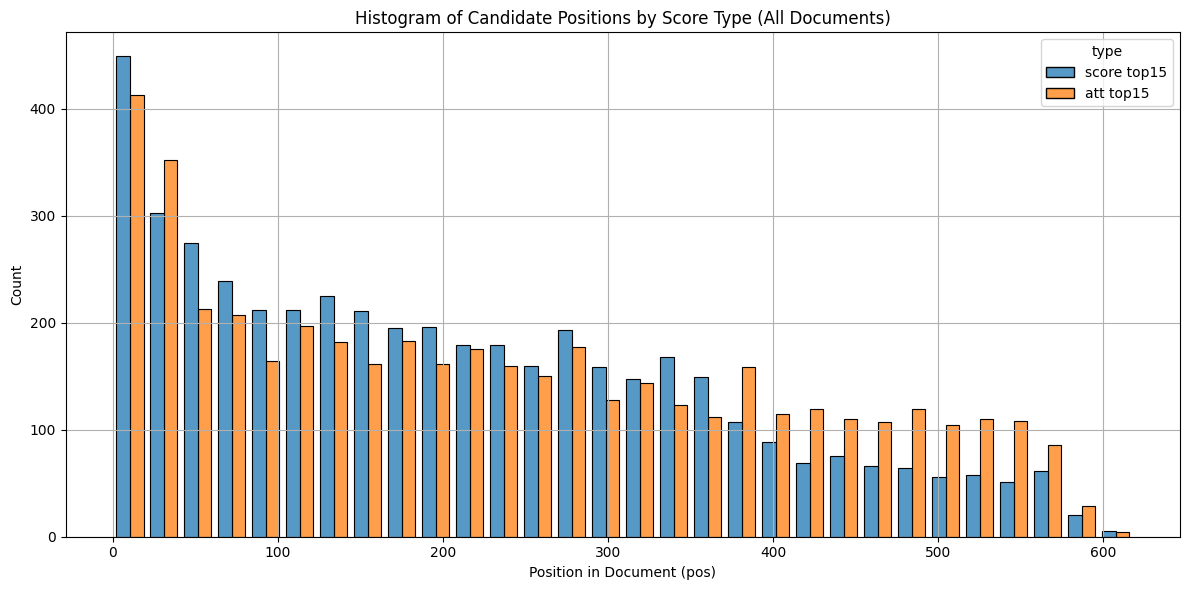

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 텐서 문자열 처리
df['doc_id'] = df['doc_id'].apply(lambda x: int(str(x).split('(')[-1].split(')')[0]))
df['score'] = df['score'].astype(float)
df['whole_att_score'] = df['whole_att_score'].apply(lambda x: float(str(x).split('(')[-1].split(',')[0]))
df['pos'] = df['pos'].apply(lambda x: int(str(x).split('(')[-1].split(')')[0]))



import matplotlib.pyplot as plt
import seaborn as sns

score_top_pos = []
att_top_pos = []

for doc_id, group in df.groupby('doc_id'):
    top_score_pos = group.nlargest(15, 'score')['pos'].tolist()
    top_att_pos = group.nlargest(15, 'whole_att_score')['pos'].tolist()
    
    score_top_pos.extend(top_score_pos)
    att_top_pos.extend(top_att_pos)

plot_df = pd.DataFrame({
    'pos': score_top_pos + att_top_pos,
    'type': ['score top15'] * len(score_top_pos) + ['att top15'] * len(att_top_pos)
})

plt.figure(figsize=(12, 6))
sns.histplot(data=plot_df, x='pos', hue='type', multiple='dodge', shrink=0.8, bins=30)
plt.title("Histogram of Candidate Positions by Score Type (All Documents)")
plt.xlabel("Position in Document (pos)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
new_cand_score = calculate_score2(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,0,0,0,0.,0.6,1.2e8,2)  # 0.15 0.1 0.05

23.71
28.4
28.44


In [28]:
calculate_score2(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,0,1,0,0.,0.6,1.2e8,2)

25.95
31.01
31.41


In [ ]:
calculate_score2(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,1,1,0,0.,0.6,1.2e8,2)  # 0.15 0.1 0.05

29.48
33.43
33.36


In [24]:
calculate_score2(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,1,1,0,0.,0.6,1.2e8,2)

29.68
33.21
33.25


In [45]:
for i in range(3):
    print('go')
    calculate_score2(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,0,1,0,0.6,0.6,1.2e8,i)
    calculate_score2(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,1,1,0,0.6,0.6,1.2e8,i)

15.98
19.34
19.62
16.67
19.73
20.23
16.27
19.16
19.84
16.84
20.08
20.16
16.44
19.38
19.69
16.95
19.65
20.19


In [35]:
def get_weight(center, sigma):
    x = torch.arange(512).float()
    weights = torch.exp(-(((x - center) / 50) ** 2) / (2 * sigma**2))
    weights = weights.view(1, 1, 1, 512)
    # weights[weights <= 0.7] = 0
    return weights

In [36]:
w1 = get_weight(300,0.1)
w2 = get_weight(100,0.1)
w3 = get_weight(500,0.1)
x = torch.arange(512).float()
weights = torch.exp(-(((x - 350) / 50) ** 2) / (2 * 0.5**2))
weights = weights.view(1, 1, 1, 512)
comb= 0.7*weights + 0.1*(w1+w2+w3)
combined_weight = comb / comb.amax(dim=-1, keepdim=True) 
combined_weight[0][0][0][250: 450]

tensor([3.3546e-04, 3.9335e-04, 4.6050e-04, 5.3824e-04, 6.2811e-04, 7.3180e-04,
        8.5125e-04, 9.8862e-04, 1.1463e-03, 1.3270e-03, 1.5338e-03, 1.7700e-03,
        2.0392e-03, 2.3456e-03, 2.6938e-03, 3.0887e-03, 3.5359e-03, 4.0413e-03,
        4.6115e-03, 5.2538e-03, 5.9760e-03, 6.7866e-03, 7.6949e-03, 8.7108e-03,
        9.8451e-03, 1.1110e-02, 1.2517e-02, 1.4081e-02, 1.5818e-02, 1.7746e-02,
        1.9889e-02, 2.2279e-02, 2.4962e-02, 2.8006e-02, 3.1514e-02, 3.5634e-02,
        4.0583e-02, 4.6650e-02, 5.4200e-02, 6.3659e-02, 7.5468e-02, 9.0013e-02,
        1.0752e-01, 1.2795e-01, 1.5090e-01, 1.7557e-01, 2.0076e-01, 2.2502e-01,
        2.4683e-01, 2.6486e-01, 2.7819e-01, 2.8652e-01, 2.9018e-01, 2.9013e-01,
        2.8774e-01, 2.8455e-01, 2.8204e-01, 2.8144e-01, 2.8357e-01, 2.8886e-01,
        2.9737e-01, 3.0888e-01, 3.2301e-01, 3.3934e-01, 3.5742e-01, 3.7690e-01,
        3.9746e-01, 4.1889e-01, 4.4100e-01, 4.6367e-01, 4.8680e-01, 5.1030e-01,
        5.3409e-01, 5.5811e-01, 5.8228e-

In [42]:
w1[0][0][0][200: 400]

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4013e-45, 1.6816e-44,
        2.7465e-43, 4.4309e-42, 6.8619e-41, 1.0210e-39, 1.4597e-38, 2.0050e-37,
        2.6460e-36, 3.3551e-35, 4.0873e-34, 4.7841e-33, 5.3801e-32, 5.8133e-31,
        6.0349e-30, 6.0193e-29, 5.7683e-28, 5.3111e-27, 4.6983e-26, 3.9934e-25,
        3.2610e-24, 2.5586e-23, 1.9287e-22, 1.3969e-21, 9.7210e-21, 6.4993e-20,
        4.1750e-19, 2.5768e-18, 1.5280e-17, 8.7054e-17, 4.7653e-16, 2.5062e-15,
        1.2664e-14, 6.1484e-14, 2.8680e-13, 1.2853e-12, 5.5346e-12, 2.2897e-11,
        9.1015e-11, 3.4759e-10, 1.2754e-09, 4.4963e-09, 1.5230e-08, 4.9564e-08,
        1.5498e-07, 4.6557e-07, 1.3438e-

In [7]:
from itertools import islice

for i, batch in enumerate(islice(dataloader,3)):
    print(f"Batch {i}")
    print(batch)
    

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/work/.default/anaconda3/envs/hyeongu_base/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 351, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/home/work/.default/anaconda3/envs/hyeongu_base/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 55, in fetch
    return self.collate_fn(data)
  File "/tmp/ipykernel_3482560/3439105126.py", line 9, in custom_collate_fn
    batch_dict[key] = torch.tensor([sample[key] for sample in batch])
  File "/tmp/ipykernel_3482560/3439105126.py", line 9, in <listcomp>
    batch_dict[key] = torch.tensor([sample[key] for sample in batch])
TypeError: only integer tensors of a single element can be converted to an index


In [46]:
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained("t5-" + setting_dict["model"], model_max_length=512)
token_ids = input_ids[loaded_topk_indices[54][6]]

tokenizer.convert_ids_to_tokens(token_ids)

['</s>',
 '▁sensor',
 'd',
 '▁sensors',
 '▁sensors',
 '▁target',
 '▁paper',
 '▁path',
 '▁detection',
 '▁deployment',
 '▁collaborative',
 '▁detection',
 '▁sequential',
 '▁deployment',
 '▁traffic']

In [20]:
gaussian_k = torch.exp(-(((torch.tensor(290.0) - torch.tensor(300.0)) / 50) ** 2) / (2 * (0.2 ** 2)))
gaussian_k 

tensor(0.6065)

In [8]:
calculate_score(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,1,0,0,1,1,1.2e8)

0.2843625498007968
0.3260007212405337
0.32029478458049887


In [10]:
calculate_score(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,1,0,0,1,1,1.2e8)

0.2858565737051793
0.32527948070681567
0.3214285714285714


In [7]:
calculate_score(setting_dict, cosine_similarity_rank,doc_list,labels,labels_stemed,1,0,0,1,1,1.2e8)

0.2843625498007968
0.3234763793725208
0.31972789115646255


In [27]:
a=get_score_df(setting_dict,cosine_similarity_rank,doc_list,labels,labels_stemed,1,1,0,0.6,0.5)

In [28]:
a[a['doc_id']==125][:30]

,doc_id,candidate,score,pos,att_score,length,pos2,label
11245,tensor(125),abimael guzman,"tensor(-1.0045, dtype=torch.float64)",tensor(75),"tensor(11.2117, dtype=torch.float64)",9,tensor(3.6937),0
11246,tensor(125),peace agreement,"tensor(-1.0339, dtype=torch.float64)",tensor(44),"tensor(60.9120, dtype=torch.float64)",2,tensor(3.5986),1
11247,tensor(125),president alberto fujimori,"tensor(-1.2553, dtype=torch.float64)",tensor(65),"tensor(14.1212, dtype=torch.float64)",8,tensor(3.6630),0
11248,tensor(125),journalist nicolas,"tensor(-1.3176, dtype=torch.float64)",tensor(125),"tensor(10.5170, dtype=torch.float64)",6,tensor(3.8470),0
11249,tensor(125),sunday review,"tensor(-1.3277, dtype=torch.float64)",tensor(2),"tensor(14.5800, dtype=torch.float64)",4,tensor(3.4697),0
11250,tensor(125),general amnesty,"tensor(-1.3987, dtype=torch.float64)",tensor(34),"tensor(13.1259, dtype=torch.float64)",5,tensor(3.5679),1
11251,tensor(125),peruvian government,"tensor(-1.4330, dtype=torch.float64)",tensor(59),"tensor(14.9299, dtype=torch.float64)",5,tensor(3.6446),1
11252,tensor(125),october,"tensor(-1.4887, dtype=torch.float64)",tensor(85),"tensor(8.8880, dtype=torch.float64)",4,tensor(3.7243),0
11253,tensor(125),self-dismantling,"tensor(-1.5063, dtype=torch.float64)",tensor(198),"tensor(8.7182, dtype=torch.float64)",7,tensor(4.0710),0
11254,tensor(125),political prisoners,"tensor(-1.5811, dtype=torch.float64)",tensor(239),"tensor(25.6284, dtype=torch.float64)",2,tensor(4.1967),0


In [16]:
a[a['doc_id']==125][:30]

,doc_id,candidate,score,pos,att_score,length,pos2,label
11245,tensor(125),abimael guzman,"tensor(-5.5979, dtype=torch.float64)",tensor(75),"tensor(0.1065, dtype=torch.float64)",9,tensor(3.6937),0
11246,tensor(125),peace agreement,"tensor(-6.0607, dtype=torch.float64)",tensor(44),"tensor(0.3504, dtype=torch.float64)",2,tensor(3.5986),1
11247,tensor(125),president alberto fujimori,"tensor(-7.0750, dtype=torch.float64)",tensor(65),"tensor(0.1077, dtype=torch.float64)",8,tensor(3.6630),0
11248,tensor(125),journalist nicolas,"tensor(-7.3393, dtype=torch.float64)",tensor(125),"tensor(0.1072, dtype=torch.float64)",6,tensor(3.8470),0
11249,tensor(125),sunday review,"tensor(-7.5012, dtype=torch.float64)",tensor(2),"tensor(0.0974, dtype=torch.float64)",4,tensor(3.4697),0
11250,tensor(125),general amnesty,"tensor(-7.8620, dtype=torch.float64)",tensor(34),"tensor(0.1146, dtype=torch.float64)",5,tensor(3.5679),1
11251,tensor(125),peruvian government,"tensor(-8.0883, dtype=torch.float64)",tensor(59),"tensor(0.1362, dtype=torch.float64)",5,tensor(3.6446),1
11252,tensor(125),october,"tensor(-8.2603, dtype=torch.float64)",tensor(85),"tensor(0.0724, dtype=torch.float64)",4,tensor(3.7243),0
11253,tensor(125),self-dismantling,"tensor(-8.3250, dtype=torch.float64)",tensor(198),"tensor(0.1262, dtype=torch.float64)",7,tensor(4.0710),0
11254,tensor(125),armed agitation,"tensor(-8.9263, dtype=torch.float64)",tensor(166),"tensor(0.1072, dtype=torch.float64)",4,tensor(3.9728),0


In [29]:
a.to_csv("result/duc_result_weight_0.5_0.5_self_one.csv", index=False) 